In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from Bio import Seq
from Bio.Alphabet import IUPAC

# bibliografía: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5440218/

## 0. Basic EDA

In [2]:
data = pd.read_csv("sequence_table.csv", encoding="utf-8")

data.head()

,Unnamed: 0,read_count_in_input_library,read_count_in_output_library
0,AAAAAAAAGGGCGGGGAGCTGAGCATAGGGATAGTGCCCGTCCTGA...,0.0,1.0
1,AAAAACAAGGGCCAGGAGCTGTTCATCGGGATCGTGCCCGTCCTGA...,1.0,0.0
2,AAAACCAAGGGCGAGGAGCTGCGCATCGTGATCGTGCCAGTCCTAA...,1.0,0.0
3,AAAACCAAGGGCGTGGAGCTTCCGATCGGGATCGTGCCCGTCCTGA...,1.0,0.0
4,AAAACCATGGGCGAGGACCTGCGGATCGGGGCCGTGCCCGGCCTGA...,1.0,0.0


In [3]:
data.rename(columns={"Unnamed: 0": "sequence"}, inplace=True)

data.head()

,sequence,read_count_in_input_library,read_count_in_output_library
0,AAAAAAAAGGGCGGGGAGCTGAGCATAGGGATAGTGCCCGTCCTGA...,0.0,1.0
1,AAAAACAAGGGCCAGGAGCTGTTCATCGGGATCGTGCCCGTCCTGA...,1.0,0.0
2,AAAACCAAGGGCGAGGAGCTGCGCATCGTGATCGTGCCAGTCCTAA...,1.0,0.0
3,AAAACCAAGGGCGTGGAGCTTCCGATCGGGATCGTGCCCGTCCTGA...,1.0,0.0
4,AAAACCATGGGCGAGGACCTGCGGATCGGGGCCGTGCCCGGCCTGA...,1.0,0.0


In [4]:
print(f"There are {data.shape[0]} reads. {data.shape[0] - data.sequence.value_counts().sum()} of them are repeated.")

data.describe()

There are 174025 reads. 0 of them are repeated.


,read_count_in_input_library,read_count_in_output_library
count,174025.000000,174025.000000
mean,6.332584,3.162344
std,51.371721,31.424681
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,3160.000000,2055.000000


In [5]:
# Checking for NaN values 

print(f"NaN values: \n{data.isna().sum()}")
print("")
print(f"{data.duplicated().sum()} duplicates found.")

NaN values: 
sequence                        0
read_count_in_input_library     0
read_count_in_output_library    0
dtype: int64

0 duplicates found.


## 1. What's in sequence column?

In [6]:
ref_library = "ATGAGCAAGGGCGAGGAGCTGNNSATCGGGATCGTGCCCGTCCTGATTGAGNNSGACGGCGACGTACACGGCCACAAGTTCAGCGTGCGCGGCGAGNNSGAGGGCGATGCCGACTACGGCAAGCTGGAG"

len(ref_library) == len(data.sequence[0])

True

In [7]:
data["length"] = data["sequence"].apply(lambda X: len(X))

data["length"].value_counts()

129    172973
132       201
130       187
131       180
127       176
126       171
128       137
Name: length, dtype: int64

### 1.1 Translating the sequence

In [8]:
from Bio import Seq
from Bio.Alphabet import IUPAC

def DNA2Prot(X):
    try:
        seq = Seq.Seq(X, IUPAC.unambiguous_dna)
        rna = seq.transcribe()
        prot = rna.translate()
        return str(prot)
    except Exception:
        return ""

In [9]:
data["prot"] = data["sequence"].apply(lambda X: DNA2Prot(X))

/usr/local/lib/python3.8/site-packages/Bio/Seq.py:2738: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [10]:
data.head()

,sequence,read_count_in_input_library,read_count_in_output_library,length,prot
0,AAAAAAAAGGGCGGGGAGCTGAGCATAGGGATAGTGCCCGTCCTGA...,0.0,1.0,129,KKKGGELSIGIVPVLIEAEGDGHVHKFTVRGDSKGDAEKCKLE
1,AAAAACAAGGGCCAGGAGCTGTTCATCGGGATCGTGCCCGTCCTGA...,1.0,0.0,129,KNKGQELFIGIVPVLIELDGDVHGHKFSVRGEIEGAVDYGKLE
2,AAAACCAAGGGCGAGGAGCTGCGCATCGTGATCGTGCCAGTCCTAA...,1.0,0.0,129,KTKGEELRIVIVPVLIECNGIVHGHRFSGHDEGEGDPDYDKLE
3,AAAACCAAGGGCGTGGAGCTTCCGATCGGGATCGTGCCCGTCCTGA...,1.0,0.0,129,KTKGVELPIGIVPVLIGFDGVVLGHNFSVRAECVGDADYGKLE
4,AAAACCATGGGCGAGGACCTGCGGATCGGGGCCGTGCCCGGCCTGA...,1.0,0.0,129,KTMGEDLRIGAVPGLIEDDGDVHGHQSSVRSEGEGDGYYGNLE


## 2. What's in the other columns?

array([[<AxesSubplot:title={'center':'length'}>,
        <AxesSubplot:title={'center':'read_count_in_input_library'}>],
       [<AxesSubplot:title={'center':'read_count_in_output_library'}>,
        <AxesSubplot:>]], dtype=object)

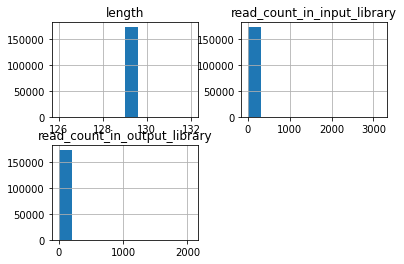

In [11]:
data.hist()

''

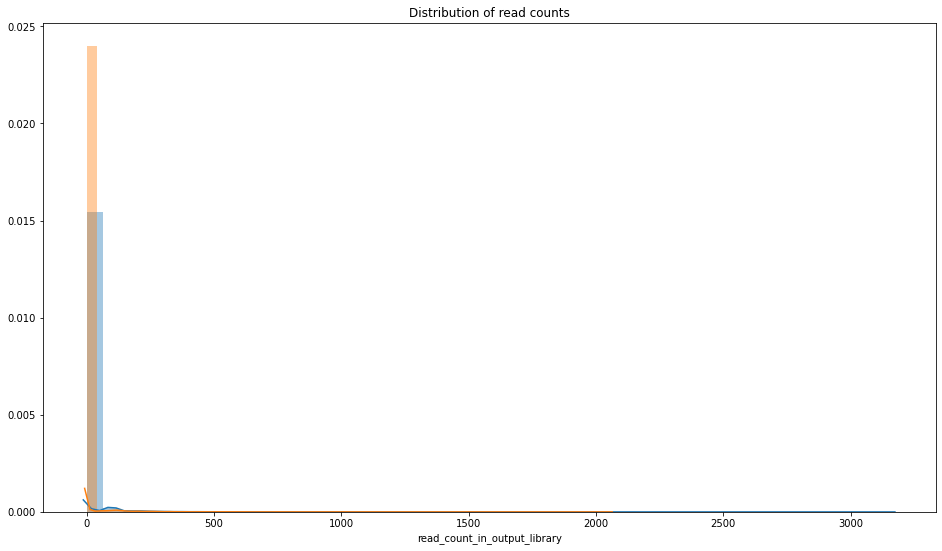

In [12]:
# Numerical columns are highly skewed

plt.figure(figsize=(16,9))

sns.distplot(data["read_count_in_input_library"])
sns.distplot(data["read_count_in_output_library"])
plt.title('Distribution of read counts')
;

''

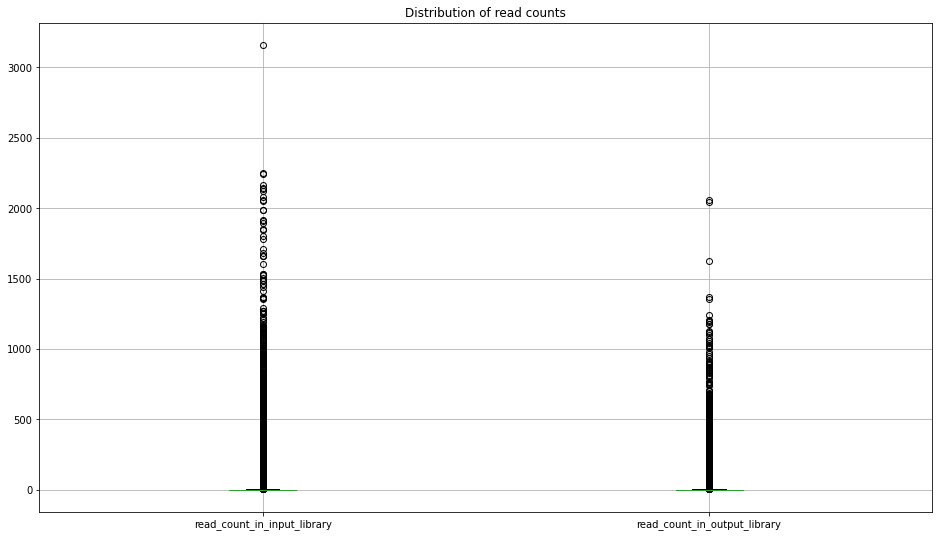

In [13]:
# Numerical columns are highly skewed

plt.figure(figsize=(16,9))

data.boxplot(column=["read_count_in_input_library", "read_count_in_output_library"])
plt.title('Distribution of read counts')
;

''

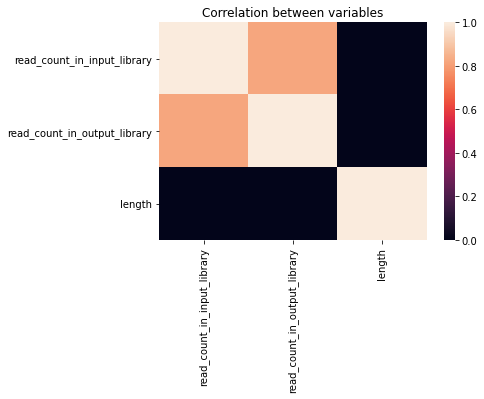

In [14]:
sns.heatmap(data.corr(), vmin=0, vmax=1)
plt.title('Correlation between variables')
;

In [15]:
print(f'Input library ratio of zeros: {len(data[data["read_count_in_input_library"] == 0]) / len(data)}')
print(f'Output library ratio of zeros: {len(data[data["read_count_in_output_library"] == 0]) / len(data)}')

Input library ratio of zeros: 0.31590288751616147
Output library ratio of zeros: 0.6693578508834938


There's a significant amount of sequences that have not bound:
- 31'6% in the input library
- 66'9% in the output library


## 2. Study



In [17]:
sorted_data = data.sort_values(["read_count_in_input_library", "read_count_in_output_library"], ascending=[False, False])

sorted_data.head(20)

,sequence,read_count_in_input_library,read_count_in_output_library,length,prot
100082,ATGAGCAAGGGCGAGGAGCTGTTCATCGGGATCGTGCCCGTCCTGA...,3160.0,2055.0,129,MSKGEELFIGIVPVLIEFDGDVHGHKFSVRGEFEGDADYGKLE
82611,ATGAGCAAGGGCGAGGAGCTGGTCATCGGGATCGTGCCCGTCCTGA...,2249.0,1023.0,129,MSKGEELVIGIVPVLIEFDGDVHGHKFSVRGEVEGDADYGKLE
68895,ATGAGCAAGGGCGAGGAGCTGCTCATCGGGATCGTGCCCGTCCTGA...,2241.0,1067.0,129,MSKGEELLIGIVPVLIEFDGDVHGHKFSVRGEFEGDADYGKLE
93693,ATGAGCAAGGGCGAGGAGCTGTGCATCGGGATCGTGCCCGTCCTGA...,2165.0,609.0,129,MSKGEELCIGIVPVLIEFDGDVHGHKFSVRGEVEGDADYGKLE
100073,ATGAGCAAGGGCGAGGAGCTGTTCATCGGGATCGTGCCCGTCCTGA...,2146.0,1241.0,129,MSKGEELFIGIVPVLIEFDGDVHGHKFSVRGECEGDADYGKLE
99011,ATGAGCAAGGGCGAGGAGCTGTTCATCGGGATCGTGCCCGTCCTGA...,2138.0,1129.0,129,MSKGEELFIGIVPVLIEGDGDVHGHKFSVRGEFEGDADYGKLE
100045,ATGAGCAAGGGCGAGGAGCTGTTCATCGGGATCGTGCCCGTCCTGA...,2121.0,711.0,129,MSKGEELFIGIVPVLIEFDGDVHGHKFSVRGEVEGDADYGKLE
77682,ATGAGCAAGGGCGAGGAGCTGGGCATCGGGATCGTGCCCGTCCTGA...,2077.0,1005.0,129,MSKGEELGIGIVPVLIEFDGDVHGHKFSVRGEFEGDADYGKLE
99768,ATGAGCAAGGGCGAGGAGCTGTTCATCGGGATCGTGCCCGTCCTGA...,2059.0,1356.0,129,MSKGEELFIGIVPVLIECDGDVHGHKFSVRGEFEGDADYGKLE
99236,ATGAGCAAGGGCGAGGAGCTGTTCATCGGGATCGTGCCCGTCCTGA...,2049.0,1069.0,129,MSKGEELFIGIVPVLIEVDGDVHGHKFSVRGEFEGDADYGKLE


### 3.1 K-Means Clustering

- Make clusters and see distributions
- See similarities/patterns in sequence between high binding affinities / not binding well

fuzzy: distribution of distances are random? word2vec
    
    substring / string statistical analysis


[[2.13672109e+00 6.87505457e-01 1.29000856e+02]
 [1.00915900e+03 5.51410042e+02 1.29000000e+02]
 [2.47996484e+02 1.50894023e+02 1.29000502e+02]]


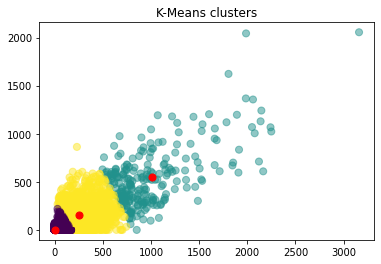

''

In [18]:
from sklearn.cluster import KMeans

X = sorted_data.drop(["sequence", "prot"], axis=1)
y = sorted_data["sequence"]

kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(X["read_count_in_input_library"], X["read_count_in_output_library"], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.title('K-Means clusters')
plt.show()

In [19]:
sorted_data["clusters"] = kmeans.labels_

In [20]:
sorted_data

,sequence,read_count_in_input_library,read_count_in_output_library,length,prot,clusters
100082,ATGAGCAAGGGCGAGGAGCTGTTCATCGGGATCGTGCCCGTCCTGA...,3160.0,2055.0,129,MSKGEELFIGIVPVLIEFDGDVHGHKFSVRGEFEGDADYGKLE,1
82611,ATGAGCAAGGGCGAGGAGCTGGTCATCGGGATCGTGCCCGTCCTGA...,2249.0,1023.0,129,MSKGEELVIGIVPVLIEFDGDVHGHKFSVRGEVEGDADYGKLE,1
68895,ATGAGCAAGGGCGAGGAGCTGCTCATCGGGATCGTGCCCGTCCTGA...,2241.0,1067.0,129,MSKGEELLIGIVPVLIEFDGDVHGHKFSVRGEFEGDADYGKLE,1
93693,ATGAGCAAGGGCGAGGAGCTGTGCATCGGGATCGTGCCCGTCCTGA...,2165.0,609.0,129,MSKGEELCIGIVPVLIEFDGDVHGHKFSVRGEVEGDADYGKLE,1
100073,ATGAGCAAGGGCGAGGAGCTGTTCATCGGGATCGTGCCCGTCCTGA...,2146.0,1241.0,129,MSKGEELFIGIVPVLIEFDGDVHGHKFSVRGECEGDADYGKLE,1
...,...,...,...,...,...,...
174011,TTTAGCTAGGGAGTGGAGGTGTTCATCGGGATCGTGCCCGTCCTGC...,0.0,1.0,129,FS*GVEVFIGIVPVLLEGDGDIYGHKFSMRGEDEDDADCGKRH,0
174012,TTTAGCTAGGGCGAGGAGCTGACCGTCGGGATCGTACCCGTCCCGA...,0.0,1.0,129,FS*GEELTVGIVPVPNEWAGDVHGHKFSVRGGGEGDDDYGKLE,0
174014,TTTAGGAAGGGCGAGGAGCTTAACATCAGCATCGTGCCCGTCCTGA...,0.0,1.0,129,FRKGEELNISIVPVLIEPDRDVPSDRFSVCGEAEAGADYGKLE,0
174015,TTTAGTAAGCGCGAGTAGCTGTTCATCGGGATCGTGCCCGTCCTGA...,0.0,1.0,129,FSKRE*LFIGIVPVLIECYGDVHCHKFSVRGELEGDADHGKPE,0


**When sorted, you can see that the sequence is much more similar to the reference sequence. Let's see the differences.**

### 3.2 Differences between high-binding affinity and low-binding affinity

In [21]:
high = sorted_data[sorted_data["clusters"] == 1]
low = sorted_data[sorted_data["clusters"] == 0]
medium = sorted_data[sorted_data["clusters"] == 2]


,sequence,read_count_in_input_library,read_count_in_output_library,length,prot,clusters
88443,ATGAGCAAGGGCGAGGAGCTGTCCATCGGGATCGTGCCCGTCCTGA...,743.0,32.0,129,MSKGEELSIGIVPVLIEGDGDVHGHKFSVRGEFEGDADYGKLE,2
93708,ATGAGCAAGGGCGAGGAGCTGTGCATCGGGATCGTGCCCGTCCTGA...,726.0,134.0,129,MSKGEELCIGIVPVLIEFDGDVHGHKFSVRGESEGDADYGKLE,2
82405,ATGAGCAAGGGCGAGGAGCTGGTCATCGGGATCGTGCCCGTCCTGA...,710.0,135.0,129,MSKGEELVIGIVPVLIECDGDVHGHKFSVRGEAEGDADYGKLE,2
86053,ATGAGCAAGGGCGAGGAGCTGTACATCGGGATCGTGCCCGTCCTGA...,704.0,0.0,129,MSKGEELYIGIVPVLIEFDGDVHGHKFSVRGEFEGDADYGKLE,2
88543,ATGAGCAAGGGCGAGGAGCTGTCCATCGGGATCGTGCCCGTCCTGA...,692.0,0.0,129,MSKGEELSIGIVPVLIEVDGDVHGHKFSVRGELEGDADYGKLE,2
